In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations
import numpy as np
plt.style.use('ggplot')

In [17]:
### Utility function
#### ttest calculator

In [36]:
def batch_ttest(df, target, cat_var, alpha=0.05):
    """Performing ANOVA test followed by t-test on categorical variables.
    df: dataframe containing data
    target : numerical variable being compared across different cases
    cat_var: categorical variable to be used for test
    alpha : statistical significance required."""

    print ("ANOVA Test Results:\n")
    # ANOVA test
    mod = ols(target + "~" + cat_var, data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    print(aov_table)
    print("\n\n")

    #  batch t-test
    print("paired t-test:\n")
    levels = df[cat_var].unique()  # levels of the categorical var
    k = len(levels)  # number of levels
    boneferroni = k * (k-1) / 2  # boneferroni correction factor
    alpha = 0.05 / boneferroni  # the updated significance level
    # getting pairs of levels for compraison
    for pair in combinations(levels, 2):
        a = df.loc[df[cat_var] == pair[0], target]  # pair one series
        b = df.loc[df[cat_var] == pair[1], target]  # pair two series
        # ttest for variances that are not equal
        _, p_val = ttest_ind(a, b, equal_var=False)
        significance = "significant" if p_val < alpha else "insignificant"
        if significance == "significant":
            print("Difference between " + pair[0] + " and " + pair[1] +
                  " is statistically significant")


In [19]:
house = pd.read_csv('housing.csv')

# EDA

In [20]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [23]:
house.describe(include=['O'])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [24]:
house.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

c:\programdata\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
c:\programdata\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


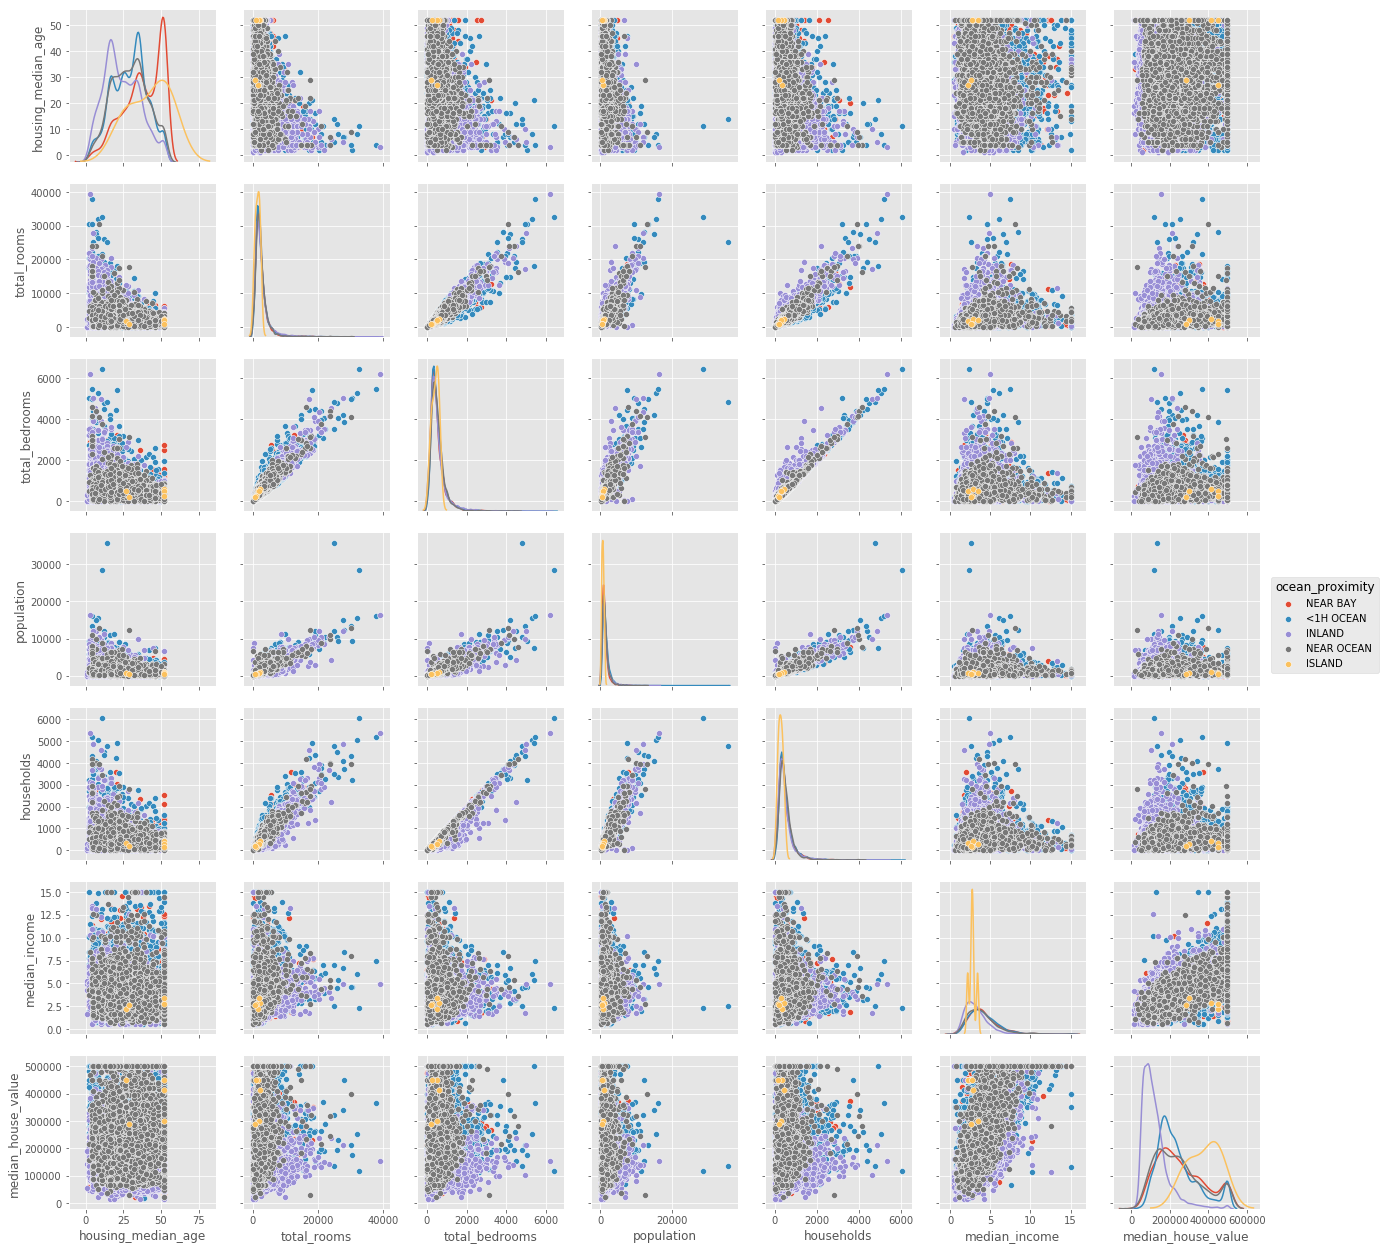

In [25]:
sns.pairplot(data = house.drop(['longitude','latitude'], axis=1), hue = 'ocean_proximity', diag_kind = 'kde' )

# Fature Engineering

## 1 - Median House Hold Income

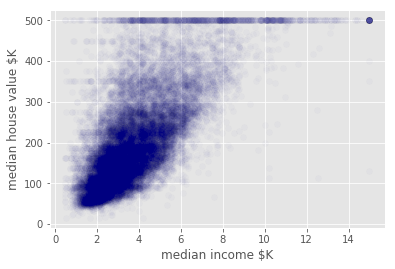

In [26]:
plt.scatter(x = house.median_income, y = house.median_house_value / 1000,
           alpha = 0.02, c = 'Navy')
plt.xlabel('median income $K')
plt.ylabel('median house value $K')
plt.show()

In [27]:
r, p = pearsonr(house.median_income,house.median_house_value)
print("These two variables are correlated with pearson corrlation \
of {} and p-value of {}".format(round(r,2),p))

These two variables are correlated with pearson corrlation of 0.69 and p-value of 0.0


## 2-  Approximity to the ocean

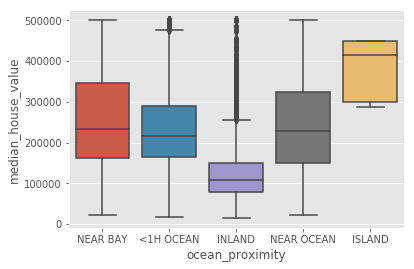

In [28]:
sns.boxplot(data = house, x = 'ocean_proximity', y = 'median_house_value')

In [29]:
house.groupby('ocean_proximity')['median_house_value'].agg(['mean','count'])

,mean,count
ocean_proximity,,
<1H OCEAN,240084.285464,9136
INLAND,124805.392001,6551
ISLAND,380440.000000,5
NEAR BAY,259212.311790,2290
NEAR OCEAN,249433.977427,2658


We need to chceck whether the differences between the means are statistically significant or mainly due to chance? We have a set of numerical variables being categorized into many classes. For this we perform ANOVA test. Then we need to check whether each pair has difference that is statistically significant. We use paired t-test. I wrote a utility function to take care of this. We use ttest since in some cases (like our case), the normality assumption (n<30) is not satisfied.

In [37]:
batch_ttest(house, 'median_house_value', 'ocean_proximity', alpha = 0.01)

ANOVA Test Results:

                       sum_sq       df            F  PR(>F)
ocean_proximity  6.543716e+13      4.0  1612.140736     0.0
Residual         2.093948e+14  20635.0          NaN     NaN



paired t-test:

Difference between NEAR BAY and <1H OCEAN is statistically significant
Difference between NEAR BAY and INLAND is statistically significant
Difference between <1H OCEAN and INLAND is statistically significant
Difference between <1H OCEAN and NEAR OCEAN is statistically significant
Difference between INLAND and NEAR OCEAN is statistically significant
Difference between INLAND and ISLAND is statistically significant
